Advanced: Accessing and Plotting Meshes
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
%matplotlib inline

In [3]:
import phoebe

logger = phoebe.logger()

b = phoebe.default_binary()

The 'Mesh' Dataset
----------------------

You must create a mesh dataset and specify the times and columns which you'd like exposed.  For more information, see the tutorial on the [MESH dataset](MESH.ipynb).

The mesh will be exposed at the times specified by the `compute_times` Parameter, as well as any times referenced by the `include_times` [SelectParameter](../api/phoebe.parameters.SelectParameter.md).

So let's add an LC and MESH datasets.


In [4]:
b.add_dataset('lc', times=phoebe.linspace(0,1,6))

<ParameterSet: 42 parameters | contexts: compute, constraint, dataset, figure>

In [5]:
b.add_dataset('mesh')

<ParameterSet: 8 parameters | contexts: compute, constraint, dataset>

Unlike other datasets, the mesh dataset cannot accept actual observations, so there is no `times` parameter, only the `compute_times` and `compute_phases` parameters.  For more details on these, see the [Advanced: Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [6]:
print(b.get_parameter(qualifier='compute_times', kind='mesh'))

Parameter: compute_times@mesh01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@mesh01@dataset
                      Related to: period@binary@component, dpdt@binary@component, phases_t0@mesh01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@mesh01@dataset



In [7]:
print(b.get_parameter(qualifier='include_times', kind='mesh'))

Parameter: include_times@mesh01@dataset
                       Qualifier: include_times
                     Description: append to compute_times from the following datasets/time standards
                           Value: []
                         Choices: lc01, t0_perpass@binary, t0_supconj@binary, t0_ref@binary, t0@system
                  Constrained by: 
                      Constrains: None
                      Related to: None



Note that we can manually set the times of the mesh AND/OR reference the times for existing non-mesh datasets (such as the light curve we just added) as well as any of the various t0s in the system.

In [8]:
b.set_value('compute_times', kind='mesh', value=[10])

In [9]:
b.set_value('include_times', kind='mesh', value=['lc01'])

In [10]:
b.run_compute()

<ParameterSet: 61 parameters | kinds: lc, mesh>

In [11]:
print(b.filter(kind='mesh', context='model').times)

['00.000000', '00.200000', '00.400000', '00.600000', '00.800000', '01.000000', '10.000000']


By default, the mesh only exposes the geometric columns of the triangles, in both plane-of-sky and roche coordinates.

In [12]:
print(b.filter(kind='mesh', context='model').qualifiers)

['times', 'uvw_elements', 'uvw_normals', 'xyz_elements', 'xyz_normals']


But we can also specify other columns to be included (by setting the `columns` [SelectParameter](../api/phoebe.parameters.SelectParameter.md) *before* calling [run_compute](../api/phoebe.frontend.bundle.Bundle.run_compute.md))

In [13]:
print(b.get_parameter(qualifier='columns', kind='mesh', context='dataset'))

Parameter: columns@mesh01@dataset
                       Qualifier: columns
                     Description: columns to expose within the mesh
                           Value: []
                         Choices: volume, xs, ys, zs, vxs, vys, vzs, nxs, nys, nzs, us, vs, ws, vus, vvs, vws, nus, nvs, nws, areas, loggs, teffs, rprojs, mus, visibilities, visible_centroids, rs, intensities@lc01, normal_intensities@lc01, abs_intensities@lc01, abs_normal_intensities@lc01, boost_factors@lc01, ldint@lc01, pblum_ext@lc01, abs_pblum_ext@lc01, ptfarea@lc01
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [14]:
b.set_value('columns', value=['teffs'])

In [15]:
b.run_compute()

Sat, 30 May 2020 14:11 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 75 parameters | kinds: lc, mesh>

In [16]:
print(b.filter(kind='mesh', context='model').qualifiers)

['times', 'uvw_elements', 'uvw_normals', 'xyz_elements', 'xyz_normals', 'teffs']


In [17]:
print(b.get_value('teffs', time=0.0, component='primary'))

[6026.7845722  6026.84439939 6026.78105231 ... 5993.51016065 5993.2855728
 5994.18366387]


Any of the exposed columns are then available for plotting the mesh, via [b.plot](../api/phoebe.parameters.ParameterSet.plot.md).

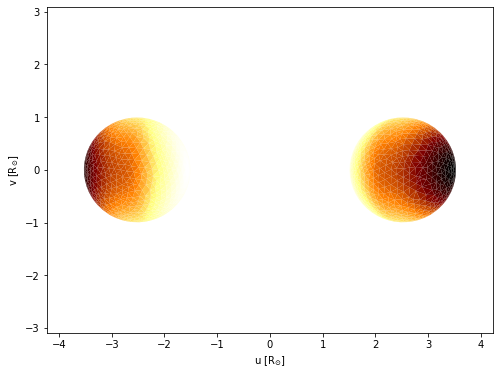

In [18]:
afig, mplfig = b.plot(kind='mesh', time=0.2, fc='teffs', ec='none', show=True)

Additionally, if we know that we only want to expose (and plot) the mesh in plane-of-sky, we can save some computation time by ommitting roche coordinates when computing the model.  This is done via the `coordinates` [SelectParameter](../api/phoebe.parameters.SelectParameter.md).

In [19]:
print(b.get_parameter(qualifier='coordinates', kind='mesh', context='dataset'))

Parameter: coordinates@mesh01@dataset
                       Qualifier: coordinates
                     Description: coordinates to expose the mesh.  uvw (plane of sky) and/or xyz (roche)
                           Value: ['xyz', 'uvw']
                         Choices: xyz, uvw
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [20]:
b.set_value('coordinates', value=['uvw'])

In [21]:
b.run_compute()

Sat, 30 May 2020 14:11 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 47 parameters | kinds: lc, mesh>

In [22]:
print(b.filter(kind='mesh', context='model').qualifiers)

['times', 'uvw_elements', 'uvw_normals', 'teffs']
